# **다중 세대 아키텍쳐(Multi Generation Architecture)**

- 데이터(튜플)을 replace하지 않고 같은 영역에 추가로 보관해놓고 활용하는 방법이다
- 데이터를 업데이트할 때, 새로운 값으로 변경하는 것이 아니라 새로운 레코드를 추가하고 이전 레코드는 유효 범위를 마킹하여 처리
- 데이터베이스에는 여러 버전의 레코드들이 저장되게 된다.
- 사용자의 query가 들어오면 현재 격리 수준에 맞춰 적절한 버전의 레코드를 선택해 반환


- MGA에서는 튜플(Tuple)을 업데이트 할 때 새로운 값으로 변경(Replace)하는 것이 아니라 동일한 데이터 페이지 내에서 새로운 튜플을 추가하고, 이전 튜플은 유효 범위를 마킹해 처리.

- 예를 들어 포스트그레SQL의 MGA를 간략히 살펴보자.
  - <그림 1>의 왼쪽 표에서 보는 것처럼 XMIN에 XID 10이 세팅돼 있고, XMAX에는 아직 세팅된 값이 없을 때 튜플1, 튜플2, 튜플3은 XID 10부터 현재 XID까지 유효한 액티브 튜플.
  - XID가 30일때 업데이트문을 실행하면 오른쪽 표와 같이 나타난다.
  - 기존 튜플2의 XMAX에 XID 30을 세팅해 튜플2의 이전 버전임을 표시하고, 새로운 튜플2를 추가해 XMIN 값을 세팅.
  -  튜플2의 이전 버전은 XMIN 10, XMAX 30에 의해서 XID 10부터 XID 30 사이의 범위에서 가시적인 값이고, 새로운 튜플2는 XID 30부터 현재까지 가시적인 액티브 튜플.


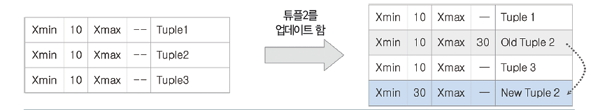

- MGA가 페이지 내부에서 구체적으로 어떻게 동작하며 서로 다른 세션끼리 어떻게 스냅샷 이미지(snapshot image)를 선택(SELECT)하는지 <그림 2>의 처리 과정을 통해 알아보자.
- T0 시점은 XID 10, T1 시점은 XID 20, T2 시점은 XID 30, T3 시점은 XID 40이라고 가정.


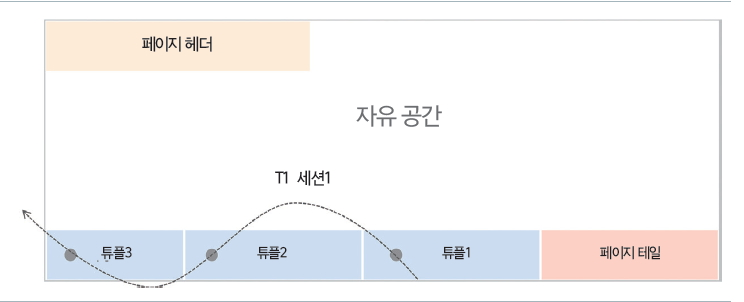

- <그림 2>은 T1 시점일 때, 세션 1에서 셀렉트(SELECT)문을 실행하면 XID가 20 이전인 튜플1, 튜플2, 튜플3이 읽히는 것을 보여준다.


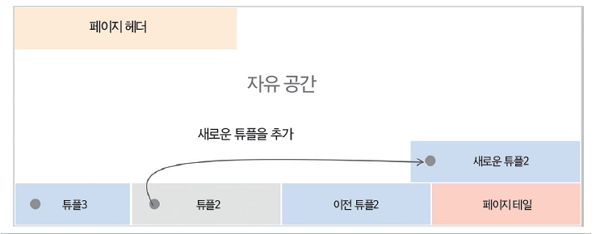

- <그림 3>은 T2 시점일 때, 튜플2를 업데이트하면 데이터 페이지에서 값을 변경하는 것이 아니라 새로운 튜플을 추가하고 오래된 튜플은 XMAX에 유효한 XID 범위 값을 세팅한다는 것을 알 수 있다.


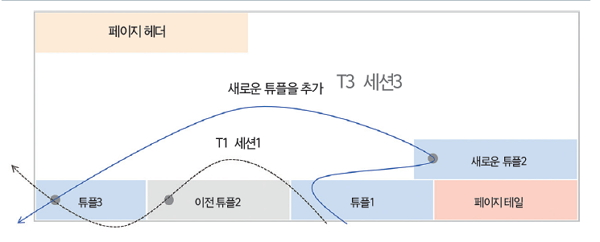

<그림 4>는 T1 시점일 때, 오픈된 세션1에서 선택하면 튜플1, 이전 튜플2, 튜플3이 반환되고, T3 시점일 때, 오픈된 세션3에서 선택하면 튜플1, 새로운 튜플2, 튜플3이 반환되는 것을 볼 수 있다.
